In [36]:
# Google Drive setup
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
!pip install visualkeras
import visualkeras

In [38]:
!git clone https://github.com/kavin808/arial.ttf.git

fatal: destination path 'arial.ttf' already exists and is not an empty directory.


In [39]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import keras.layers
from keras import backend as K
import keras
import numpy as np
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from PIL import ImageFont

In [40]:
@keras.saving.register_keras_serializable()
def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

@keras.saving.register_keras_serializable()
def jaccard_coef_loss(y_true, y_pred):
    return -jaccard_coef(y_true, y_pred)  # -1 multiplied as we want to minimize this value as loss function

In [41]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

model_path = "/content/gdrive/MyDrive/cell_nuclei_data/output/unet/20240424-06:51_unet_cell_nuclei_150epochs.keras"
my_model = load_model(model_path)

In [42]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

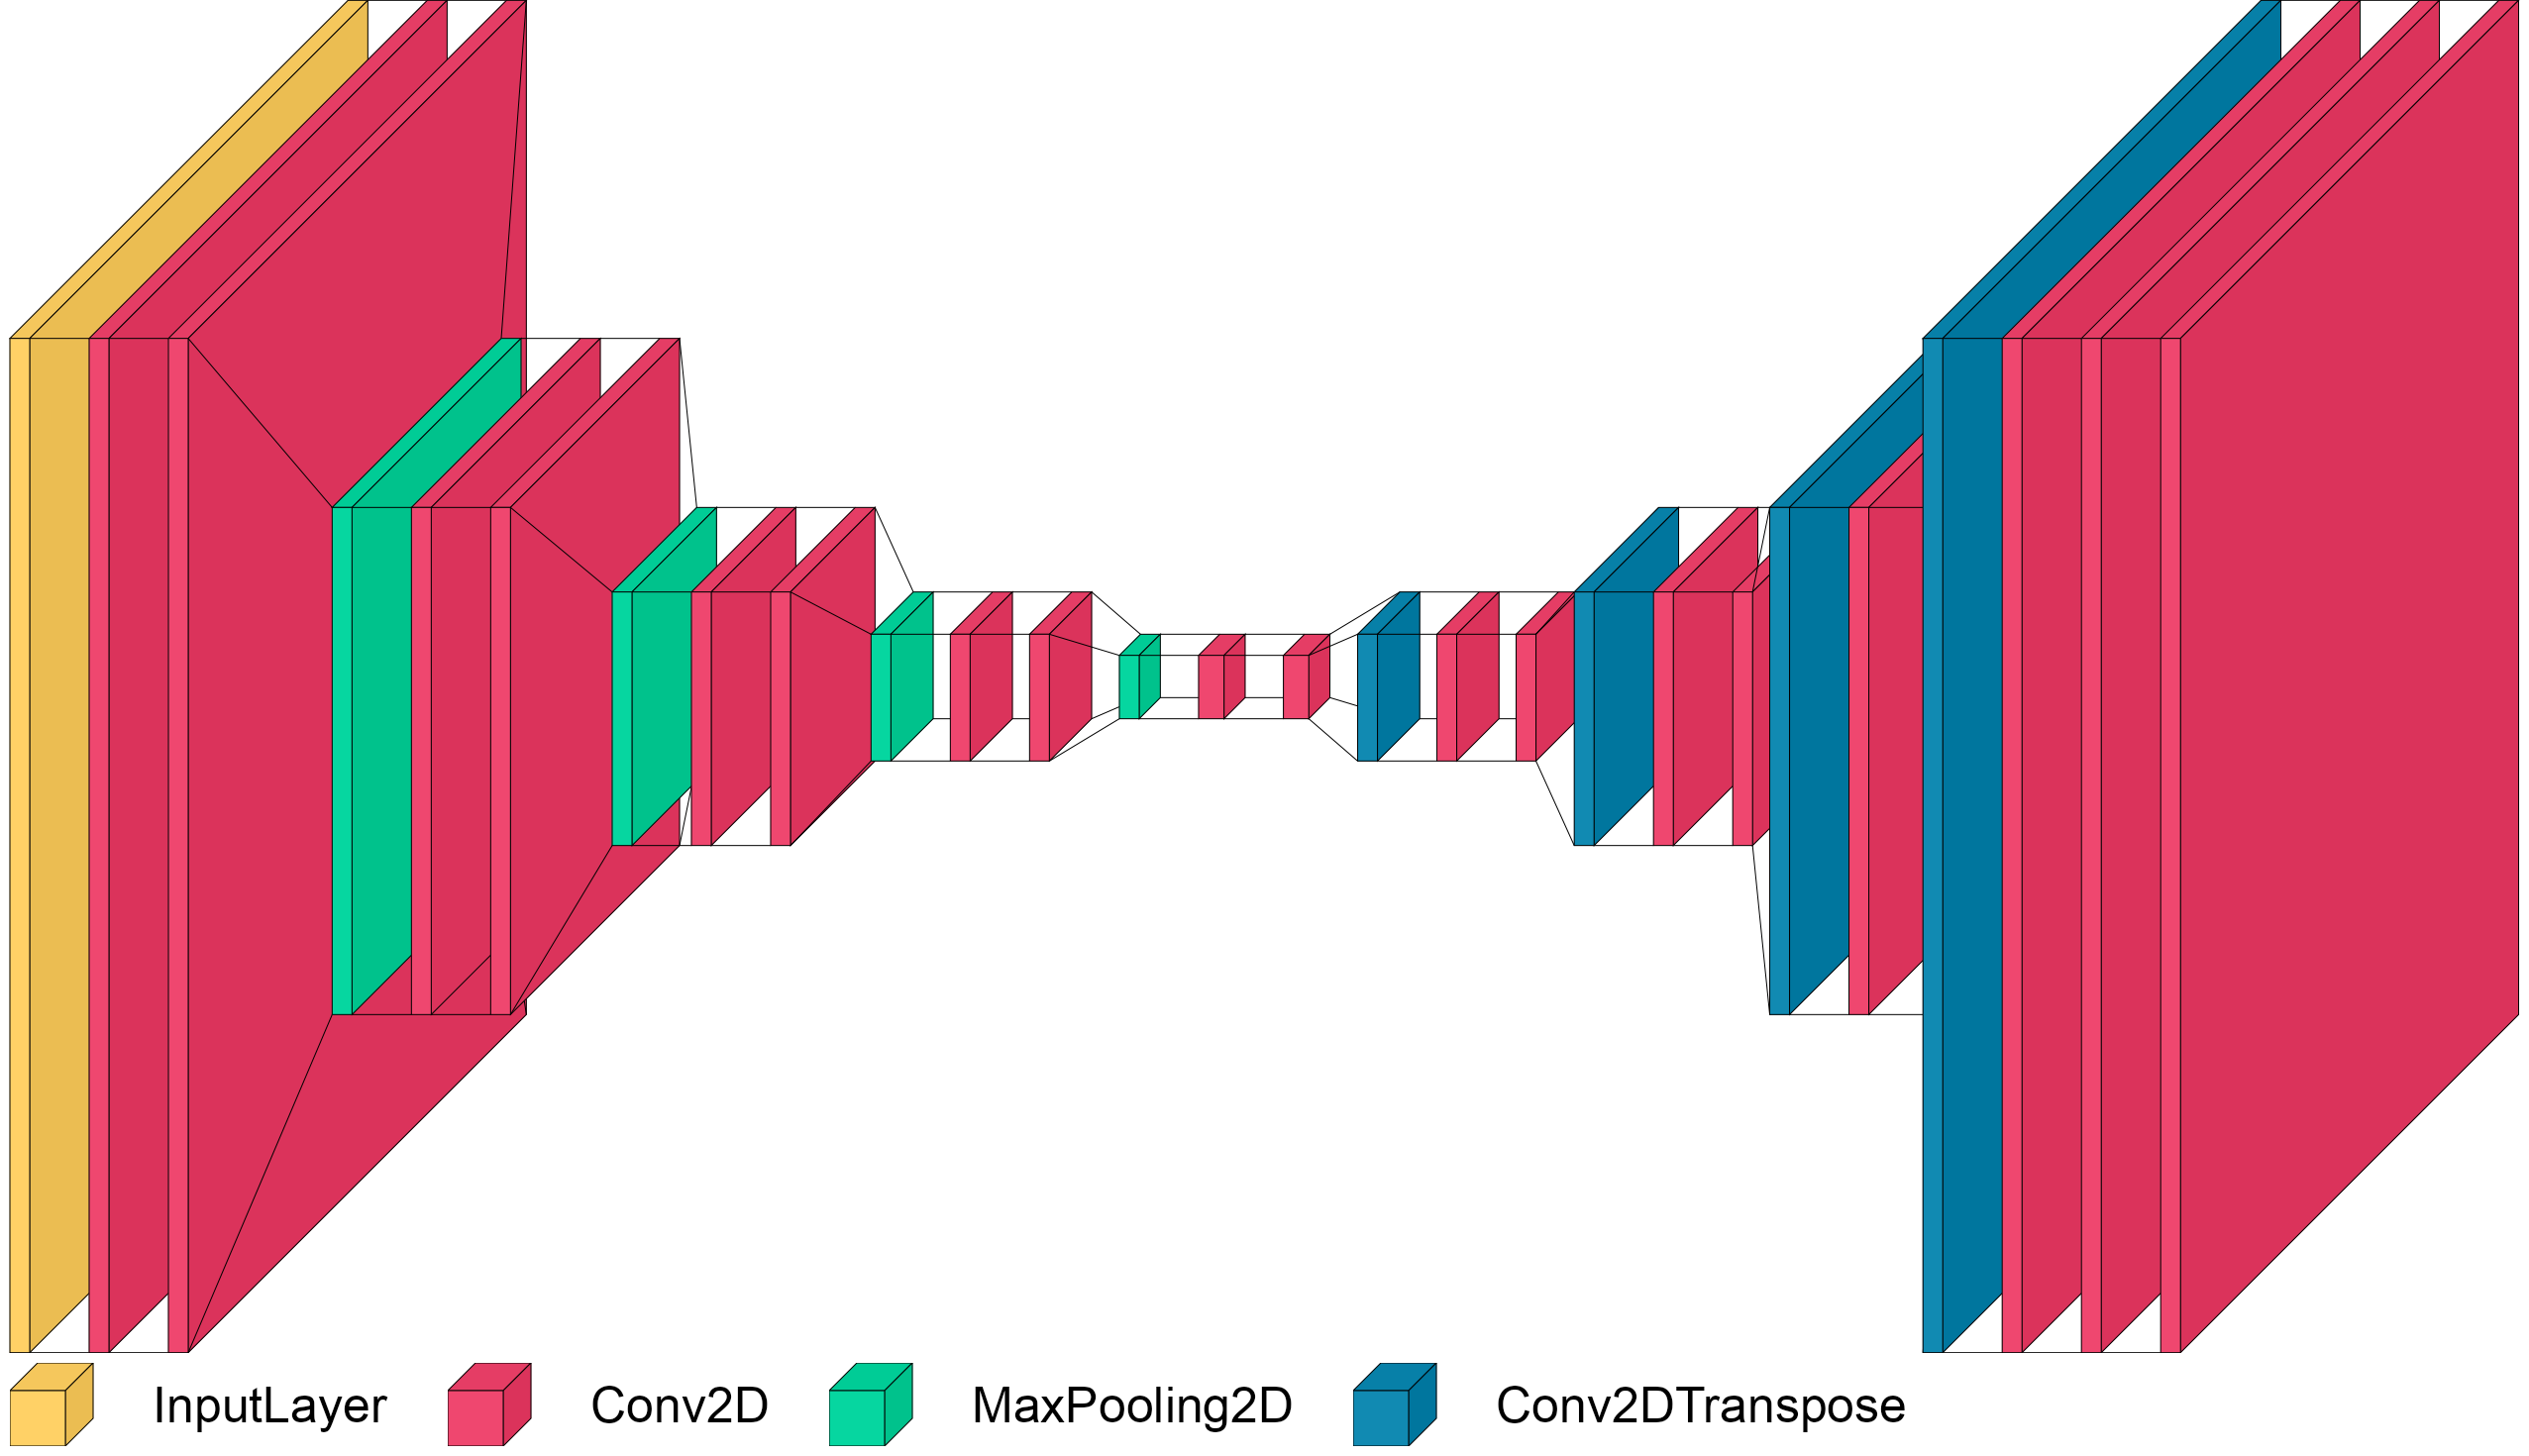

In [43]:
from collections import defaultdict
color_map = defaultdict(dict)

font = ImageFont.truetype("/content/arial.ttf/arial.ttf", 50)  # using comic sans is strictly prohibited!
visualkeras.layered_view(my_model, legend=True, draw_funnel=True, font=font, spacing=60, color_map=color_map, type_ignore=[Dropout, Concatenate])  # font is optional!
# visualkeras.layered_view(my_model).show() # display using your system viewer
# visualkeras.layered_view(my_model, to_file='output.png') # write to disk

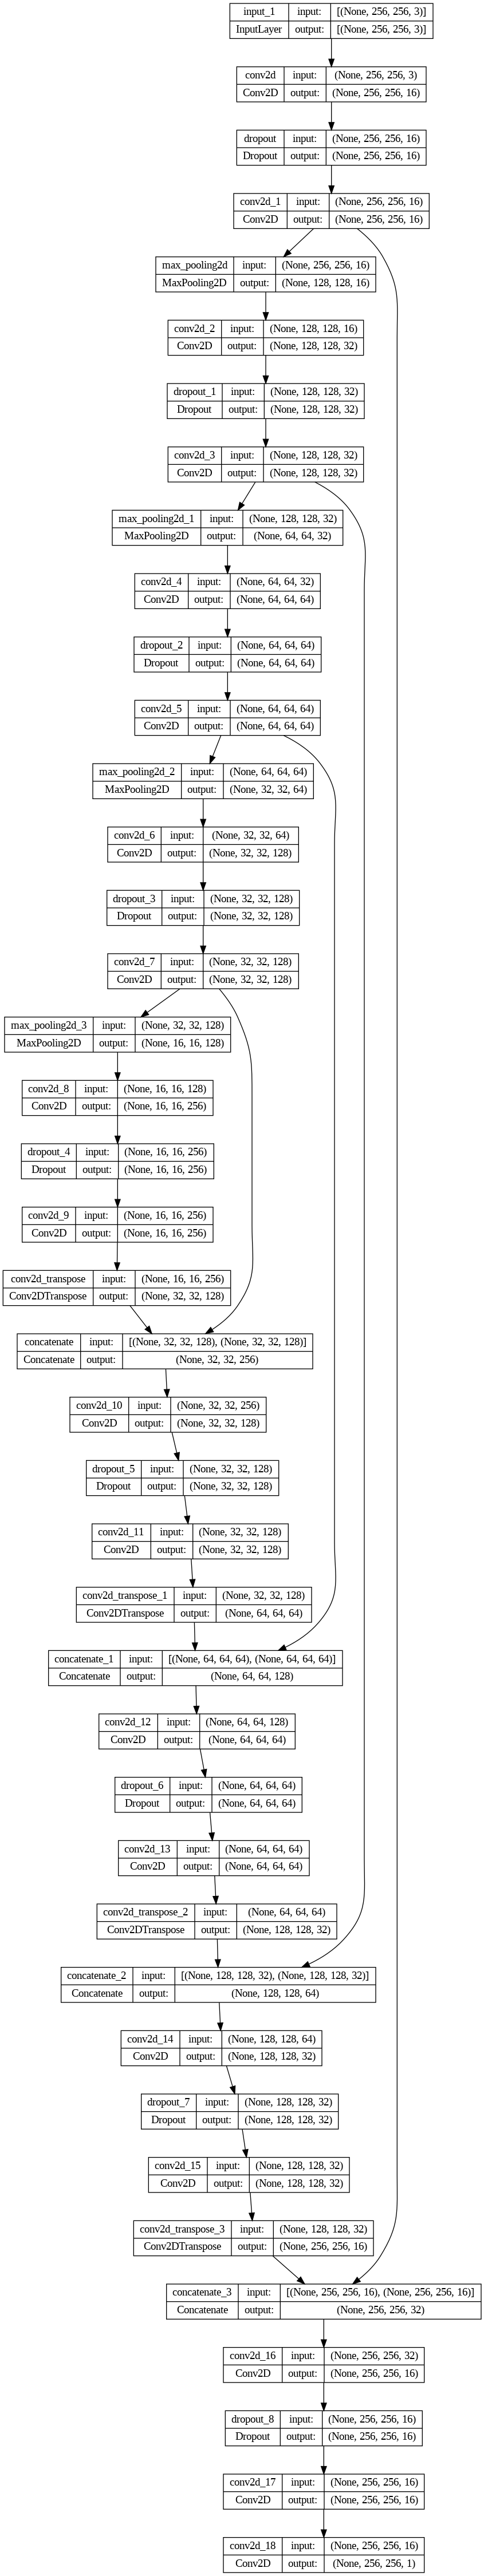

In [44]:
dot_img_file = './model_1.png'
keras.utils.plot_model(my_model, to_file=dot_img_file, show_shapes=True)

In [45]:
keras.utils.model_to_dot(my_model, show_shapes=True)